In [1]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 25.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.0/801.0 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 KB 37.9 MB/s eta 0:00:00


In [3]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [4]:
df = pd.read_csv('sample_data.csv')

In [6]:
print(df)

               u         v        w
0       0.379934 -0.977337 -0.30325
1       0.151470 -0.604772 -0.51325
2      -0.192402 -0.656734  0.24950
3       0.101699 -0.865609  0.23550
4       0.090522 -1.104613 -0.38925
...          ...       ...      ...
491885  3.547087  0.005302 -0.23800
491886  2.124233 -0.519437  0.35050
491887  2.887112 -0.871297 -0.21800
491888  3.572781 -0.568037  0.00400
491889  2.127863 -0.520366  0.25525

[491890 rows x 3 columns]


In [1]:
import datetime
one_d = datetime.timedelta(days = 1)

In [13]:
print(one_d)

0:00:01


In [5]:
df['ds'] = df.index * one_d

In [6]:
df['ds'] = df['ds'] + datetime.datetime.now()

In [7]:
df['y'] = df['u']

In [18]:
m = Prophet()
m.fit(df.iloc[:10000])

11:01:06 - cmdstanpy - INFO - Chain [1] start processing
11:01:10 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=100)

In [20]:
print(future)

                              ds
0     2023-11-02 10:58:57.286962
1     2023-11-03 10:58:57.286962
2     2023-11-04 10:58:57.286962
3     2023-11-05 10:58:57.286962
4     2023-11-06 10:58:57.286962
...                          ...
10095 2051-06-23 10:58:57.286962
10096 2051-06-24 10:58:57.286962
10097 2051-06-25 10:58:57.286962
10098 2051-06-26 10:58:57.286962
10099 2051-06-27 10:58:57.286962

[10100 rows x 1 columns]


In [21]:
forecast = m.predict(future)

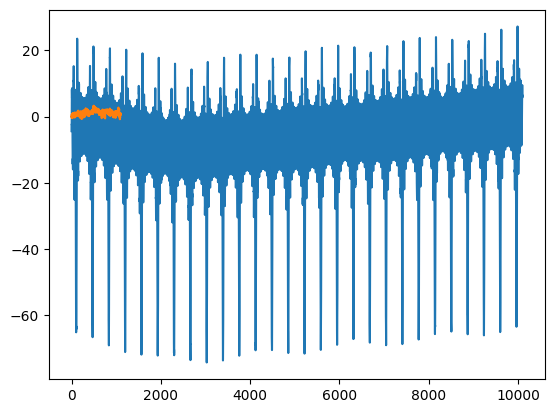

In [22]:
plt.plot(forecast['yhat'])
plt.plot(df['y'].iloc[:1100])